In [2]:
import pandas as pd
import numpy as np

weather_data = pd.read_csv('data/weather_data.csv')
weather_data.columns = ['datetime','weather','high_temp','low_temp','daytime','night']

area_fifteen_data = pd.read_csv('data/area_fifteen_data.csv')
area_fifteen_data.columns= ['datetime','total_power']

trade_daily_data = pd.read_csv('data/trade_daily_data.csv')
trade_daily_data.columns = ['area_type','datatime','max_power','min_power']

In [3]:
weather_data

,datetime,weather,high_temp,low_temp,daytime,night
0,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
1,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
2,2018年1月2日,多云/多云,22℃,15℃,无持续风向<3级,无持续风向<3级
3,2018年1月3日,多云/阴,23℃,15℃,无持续风向<3级,无持续风向<3级
4,2018年1月4日,多云/小雨,21℃,16℃,无持续风向<3级,无持续风向<3级
...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35℃,26℃,北风1-2级,北风1-2级
1341,2021年8月28日,雷阵雨/多云,33℃,26℃,北风1-2级,北风1-2级
1342,2021年8月29日,雷阵雨/雷阵雨,32℃,25℃,北风1-2级,北风1-2级
1343,2021年8月30日,阵雨/阵雨,34℃,26℃,北风1-2级,北风1-2级


In [4]:
weather_data['high_temp'] = weather_data['high_temp'].map(lambda tmp: tmp.replace("℃",''))
weather_data['low_temp'] = weather_data['low_temp'].map(lambda tmp: tmp.replace("℃",''))

# weather_data['low_temp'] = weather_data['low_temp'].astype(int)
# weather_data['high_temp'] = weather_data['high_temp'].astype(int)

weather_ = weather_data.join(weather_data['weather'].str.split('/',expand=True))
weather_data['weather1'], weather_data['weather2'] = weather_[0], weather_[1]

weather_data

,datetime,weather,high_temp,low_temp,daytime,night,weather1,weather2
0,2018年1月1日,多云/多云,22,12,无持续风向<3级,无持续风向<3级,多云,多云
1,2018年1月1日,多云/多云,22,12,无持续风向<3级,无持续风向<3级,多云,多云
2,2018年1月2日,多云/多云,22,15,无持续风向<3级,无持续风向<3级,多云,多云
3,2018年1月3日,多云/阴,23,15,无持续风向<3级,无持续风向<3级,多云,阴
4,2018年1月4日,多云/小雨,21,16,无持续风向<3级,无持续风向<3级,多云,小雨
...,...,...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35,26,北风1-2级,北风1-2级,雷阵雨,雷阵雨
1341,2021年8月28日,雷阵雨/多云,33,26,北风1-2级,北风1-2级,雷阵雨,多云
1342,2021年8月29日,雷阵雨/雷阵雨,32,25,北风1-2级,北风1-2级,雷阵雨,雷阵雨
1343,2021年8月30日,阵雨/阵雨,34,26,北风1-2级,北风1-2级,阵雨,阵雨


In [5]:
weather1 = weather_data['weather1'].unique()
weather2 = weather_data['weather2'].unique()
weather_all_level = np.unique(np.append(weather1,weather2)) # 将两种水平天气的描述合并并去重

weather_level_dict = {}
for index, item in enumerate(weather_all_level):
    weather_level_dict[item] = index
weather_data['weather1'] = weather_data['weather1'].map(weather_level_dict)
weather_data['weather2'] = weather_data['weather2'].map(weather_level_dict)
weather_data

,datetime,weather,high_temp,low_temp,daytime,night,weather1,weather2
0,2018年1月1日,多云/多云,22,12,无持续风向<3级,无持续风向<3级,3,3
1,2018年1月1日,多云/多云,22,12,无持续风向<3级,无持续风向<3级,3,3
2,2018年1月2日,多云/多云,22,15,无持续风向<3级,无持续风向<3级,3,3
3,2018年1月3日,多云/阴,23,15,无持续风向<3级,无持续风向<3级,3,13
4,2018年1月4日,多云/小雨,21,16,无持续风向<3级,无持续风向<3级,3,7
...,...,...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35,26,北风1-2级,北风1-2级,15,15
1341,2021年8月28日,雷阵雨/多云,33,26,北风1-2级,北风1-2级,15,3
1342,2021年8月29日,雷阵雨/雷阵雨,32,25,北风1-2级,北风1-2级,15,15
1343,2021年8月30日,阵雨/阵雨,34,26,北风1-2级,北风1-2级,14,14


In [6]:
del weather_data['weather']

wind_level1 = weather_data['daytime'].unique()
wind_level2 = weather_data['night'].unique()
wind_all_level = np.unique(np.append(wind_level1,wind_level2)) # 将两种水平风向的描述合并并去重

wind_level_dict = {}
for index, item in enumerate(wind_all_level):
    wind_level_dict[item] = index
weather_data['daytime'] = weather_data['daytime'].map(wind_level_dict)
weather_data['night'] = weather_data['night'].map(wind_level_dict)

In [7]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%Y年%m月%d日')

In [8]:
weather_level_dict

{'中到大雨': 0,
 '中雨': 1,
 '中雨-大雨': 2,
 '多云': 3,
 '大到暴雨': 4,
 '大雨': 5,
 '小到中雨': 6,
 '小雨': 7,
 '小雨-中雨': 8,
 '局部多云': 9,
 '晴': 10,
 '晴间多云': 11,
 '暴雨': 12,
 '阴': 13,
 '阵雨': 14,
 '雷阵雨': 15,
 '雾': 16}

In [9]:
wind_level_dict

{'东北偏东风2': 0,
 '东北风1-2级': 1,
 '东北风3-4级': 2,
 '东北风3～4级': 3,
 '东南风1-2级': 4,
 '东南风3-4级': 5,
 '东南风3～4级': 6,
 '东南风4-5级': 7,
 '东风1-2级': 8,
 '东风3-4级': 9,
 '东风3～4级': 10,
 '东风8-9级': 11,
 '北风1-2级': 12,
 '北风3': 13,
 '北风3-4级': 14,
 '北风3～4级': 15,
 '北风4-5级': 16,
 '北风4～5级': 17,
 '南风1-2级': 18,
 '南风3-4级': 19,
 '南风3～4级': 20,
 '南风4～5级': 21,
 '微风<3级': 22,
 '无持续风向1-2级': 23,
 '无持续风向<3级': 24,
 '无持续风向微风': 25,
 '西南风1-2级': 26,
 '西南风3-4级': 27}

In [10]:
with open('area.csv') as f:

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_21864/4114404901.py, line 1)

In [11]:
weather_data.to_csv('./data/area.csv',index=False)

In [12]:
import pandas as pd
import numpy as np

area_fifteen_data = pd.read_csv('data/area_fifteen_data.csv')
area_fifteen_data.columns= ['datetime','total_power']
area_fifteen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128156 entries, 0 to 128155
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     128156 non-null  object 
 1   total_power  128156 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [13]:
area_date_ = area_fifteen_data.join(area_fifteen_data['datetime'].str.split(' ', expand=True))
area_fifteen_data['date_day'], area_fifteen_data['date_hour'] = area_date_[0],area_date_[1]

order = ['datetime','date_day','date_hour','total_power'] # 修改数据列的顺序
area_fifteen_data = area_fifteen_data[order]
area_fifteen_data.head()

,datetime,date_day,date_hour,total_power
0,2018/1/1 00:00:00,2018/1/1,00:00:00,244033.7682
1,2018/1/1 00:15:00,2018/1/1,00:15:00,232720.6402
2,2018/1/1 00:30:00,2018/1/1,00:30:00,231685.6891
3,2018/1/1 00:45:00,2018/1/1,00:45:00,227581.3317
4,2018/1/1 01:00:00,2018/1/1,01:00:00,233482.4269


In [14]:
del area_fifteen_data['datetime']
data = area_fifteen_data 
data['date_day'] = pd.to_datetime(data['date_day'], format='%Y/%m/%d')  # 时间标准化
data = data.pivot(index='date_day',columns='date_hour',values='total_power').rename_axis(columns=None).reset_index()  # 将时刻转为列
# data.to_csv('./data/area.csv',index=False)
data.head()

,date_day,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,2018-01-01,244033.7682,232720.6402,231685.6891,227581.3317,233482.4269,224464.7554,223881.3222,221522.7156,228138.5805,...,234535.8695,232184.9459,238362.0286,228433.3587,224915.6451,222615.9423,225228.9648,213662.3933,209709.2317,205839.6378
1,2018-01-02,207655.1990,200673.8192,199179.7267,199204.4665,213530.4627,192532.5988,188883.3155,188022.8548,194513.1024,...,269290.6416,267889.5761,271585.0201,263482.9724,260430.3031,268515.5360,260295.6097,270992.1341,250472.5514,244224.2000
2,2018-01-03,248503.4810,236440.6647,233974.9909,232474.0213,235308.6404,231016.0498,230976.8460,226422.5222,233703.3045,...,274789.8773,274039.4817,280565.2247,289556.1424,266657.4444,264818.1174,268641.5741,255383.4266,253372.3768,247607.8786
3,2018-01-04,253310.1506,244545.2255,239774.3340,242000.7265,245132.8146,236083.3085,236025.2417,233812.6096,242392.4277,...,271083.3414,269644.6551,278659.1120,268758.0021,264407.4489,263243.3501,266465.7950,255016.3169,252476.5852,246234.4829
4,2018-01-05,251749.1014,243126.3908,239751.1917,238086.1316,242231.9352,234582.4407,234513.2381,231791.2725,236081.0479,...,276483.8019,281264.4793,283348.3320,272798.8725,271016.2719,266879.9107,271510.8157,257809.0623,253594.7963,252019.4440


In [15]:
data.index = data['date_day']
del data['date_day']
data.head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date_day,,,,,,,,,,,,,,,,,,,,,
2018-01-01,244033.7682,232720.6402,231685.6891,227581.3317,233482.4269,224464.7554,223881.3222,221522.7156,228138.5805,220047.4568,...,234535.8695,232184.9459,238362.0286,228433.3587,224915.6451,222615.9423,225228.9648,213662.3933,209709.2317,205839.6378
2018-01-02,207655.1990,200673.8192,199179.7267,199204.4665,213530.4627,192532.5988,188883.3155,188022.8548,194513.1024,187211.6824,...,269290.6416,267889.5761,271585.0201,263482.9724,260430.3031,268515.5360,260295.6097,270992.1341,250472.5514,244224.2000
2018-01-03,248503.4810,236440.6647,233974.9909,232474.0213,235308.6404,231016.0498,230976.8460,226422.5222,233703.3045,227215.1967,...,274789.8773,274039.4817,280565.2247,289556.1424,266657.4444,264818.1174,268641.5741,255383.4266,253372.3768,247607.8786
2018-01-04,253310.1506,244545.2255,239774.3340,242000.7265,245132.8146,236083.3085,236025.2417,233812.6096,242392.4277,229510.9984,...,271083.3414,269644.6551,278659.1120,268758.0021,264407.4489,263243.3501,266465.7950,255016.3169,252476.5852,246234.4829
2018-01-05,251749.1014,243126.3908,239751.1917,238086.1316,242231.9352,234582.4407,234513.2381,231791.2725,236081.0479,227392.3428,...,276483.8019,281264.4793,283348.3320,272798.8725,271016.2719,266879.9107,271510.8157,257809.0623,253594.7963,252019.4440


In [17]:
five_month_data = data['2021-02-01':'2021-8-31']
tmp = data
tmp

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date_day,,,,,,,,,,,,,,,,,,,,,
2018-01-01,244033.7682,232720.6402,231685.6891,227581.3317,233482.4269,224464.7554,223881.3222,221522.7156,228138.5805,220047.4568,...,234535.8695,232184.9459,238362.0286,228433.3587,224915.6451,222615.9423,225228.9648,213662.3933,209709.2317,205839.6378
2018-01-02,207655.1990,200673.8192,199179.7267,199204.4665,213530.4627,192532.5988,188883.3155,188022.8548,194513.1024,187211.6824,...,269290.6416,267889.5761,271585.0201,263482.9724,260430.3031,268515.5360,260295.6097,270992.1341,250472.5514,244224.2000
2018-01-03,248503.4810,236440.6647,233974.9909,232474.0213,235308.6404,231016.0498,230976.8460,226422.5222,233703.3045,227215.1967,...,274789.8773,274039.4817,280565.2247,289556.1424,266657.4444,264818.1174,268641.5741,255383.4266,253372.3768,247607.8786
2018-01-04,253310.1506,244545.2255,239774.3340,242000.7265,245132.8146,236083.3085,236025.2417,233812.6096,242392.4277,229510.9984,...,271083.3414,269644.6551,278659.1120,268758.0021,264407.4489,263243.3501,266465.7950,255016.3169,252476.5852,246234.4829
2018-01-05,251749.1014,243126.3908,239751.1917,238086.1316,242231.9352,234582.4407,234513.2381,231791.2725,236081.0479,227392.3428,...,276483.8019,281264.4793,283348.3320,272798.8725,271016.2719,266879.9107,271510.8157,257809.0623,253594.7963,252019.4440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,223670.7666,211582.9503,210209.1440,208946.6294,221878.3237,205769.3276,205547.4612,204603.6416,218074.4830,202712.6189,...,218872.6151,217206.6065,230826.4669,213102.5979,212090.3762,211056.1556,227035.5852,211094.3287,209867.7853,207664.4476
2021-08-28,223349.5616,211764.0453,210494.4611,211151.4495,222604.7910,207883.8180,207955.5242,203974.3065,219258.9309,202648.5327,...,218859.4107,216779.7621,230144.0307,213149.9247,211506.2093,210342.8845,223441.6077,208200.8319,208507.1714,206999.8723
2021-08-29,222113.3896,211702.4865,211036.2858,210007.5139,224375.7399,207412.9844,206570.9228,205982.2303,218203.0552,203044.1258,...,213426.6633,213043.9812,227556.1836,208724.3182,209079.3462,207170.2737,223199.7806,208904.4145,205167.6778,204268.1608


In [18]:
for i in five_month_data.columns:
    five_month_data[i] = five_month_data[i].fillna(0)
#     print(five_month_data[i].isnull().sum())

C:\Users\新橙\AppData\Local\Temp/ipykernel_21864/4103129498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_month_data[i] = five_month_data[i].fillna(0)


In [27]:
# '2021-02-01':'2021-8-31' 先处理这五个月的数据
for index, row in five_month_data.iterrows():  # index 索引， row 一行的所有值 是一个series
    for col_index, val in row.items():  
        if val == 0:
            row_index = str(index).split(' ')[0]
            early_row_index = str(index).split(' ')[0].replace('2021','2020') # 替换为前一年等时刻的值，暂时未考虑前一年为空的情况
            data.loc[row_index,col_index] = data.loc[early_row_index,col_index]
five_month_data.head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date_day,,,,,,,,,,,,,,,,,,,,,
2021-02-01,157059.5728,143890.2674,142282.0323,141077.9734,158121.3305,138167.6229,136632.9169,137895.9002,152766.5601,132575.8702,...,155102.1809,152289.4203,167896.2720,145485.1044,142783.0101,141701.1968,161035.4040,141176.7093,141301.3473,138371.7044
2021-02-02,156723.0084,141309.6507,140500.5215,138986.6734,158108.8578,138285.5707,136266.6352,135564.9731,152992.8764,134029.5542,...,154530.5150,152453.8969,167375.2686,145708.6822,143644.5191,141772.8296,160018.1774,139318.7086,138438.0773,137218.0492
2021-02-03,154467.1241,141889.7961,143690.4743,139818.9615,156620.8140,137357.9951,135369.1456,134594.9650,152146.7040,133167.4438,...,152206.7475,149412.5781,165224.9354,142079.0278,140017.0746,139350.1515,157381.7673,137292.0573,136502.9311,135012.2265
2021-02-04,152204.1299,139744.6952,139411.9177,138182.8607,156640.2987,134493.3906,134507.9408,132246.5842,152163.9654,129996.8578,...,148124.5176,147240.8052,162378.5091,139580.4560,136815.5437,136635.1194,155445.9438,134991.0726,134687.8296,132559.0413
2021-02-05,152766.5826,138677.6677,137840.7240,136644.6420,152363.2631,132670.5312,131448.7917,130266.6058,147373.4679,131345.8987,...,146828.1250,144916.1998,163047.6352,139658.5056,136463.1603,134432.7595,153335.4961,132882.3092,132313.3518,130224.7856


In [89]:
with open('five_month_data.csv',mode='w') as f:
    five_month_data.to_csv(f)

In [119]:
# data.loc['2018-01-02','00:00:00']  获取某一行某一列的值
tmp.fillna(0)
# for i in tmp.columns:
#     tmp[i] = tmp[i].fillna(0)
for index, row in tmp.iterrows():  # index 索引， row 一行的所有值 是一个series
    for col_index, val in row.items():  
        if val == 0:
            row_index = str(index).split(' ')[0] #   2018-01-02 00:0000 = > 2018-01-02
            cur_year = row_index.split('-')[0] # 获取索引的年份
            previous_year = str(int(cur_year) - 1)
            early_row_index = row_index.replace(cur_year,previous_year) # 替换为前一年等时刻的值，暂时未考虑前一年为空的情况
            tmp.loc[row_index,col_index] = tmp.loc[early_row_index,col_index]
            
# cnt = 0  # 看是否有空值
# for i in tmp.columns:
#     cnt += tmp[i].isnull().sum()

# 填充缺失值之后的数据
with open('./data/processed_data.csv',mode='w') as f:   
    five_month_data.to_csv(f)
#             val = data.loc[row_index,col_index] #
#             print("row_ = {}, col_ = {}, val = {}".format(row_index,col_index,val))

In [120]:
tmp.to_csv('./data/processed_data.csv')

In [28]:
train = five_month_data['2021-02-01':'2021-06-30']
test = five_month_data['2021-07-01':'2021-8-31']
train.tail()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date_day,,,,,,,,,,,,,,,,,,,,,
2021-06-26,222452.3594,210298.5215,211953.6923,211816.8596,226987.8727,211641.1442,207769.6929,206449.2166,221720.0285,205790.0888,...,215952.6464,213531.5818,230856.1165,212120.5459,211545.3046,209309.7448,226923.5071,208475.0627,209191.0492,205747.8479
2021-06-27,221211.0423,211020.2141,210354.1229,209614.3854,224932.2102,207172.2729,207579.9602,205046.5636,220268.4034,203154.3391,...,212774.1045,210753.6892,226726.7710,208485.0143,210054.6064,209644.3598,222804.6828,206260.1055,206847.5884,203707.9174
2021-06-28,217867.2617,208029.3966,207083.1021,206063.5060,221276.6358,203663.8768,204350.7565,202504.6691,218534.0263,201386.4627,...,222696.9131,220009.2659,234974.4078,214021.1723,213918.4244,212892.5701,228495.5316,212446.8785,210963.8216,208450.3722
2021-06-29,224411.8850,213428.0843,214447.0079,213064.3783,227767.6224,209647.0616,209831.6218,208026.2213,222960.8222,205122.7526,...,221218.8208,218693.0703,234030.4826,215331.7656,213141.8686,213223.4718,230015.3255,211627.9443,211794.2484,209668.9527
2021-06-30,224482.1198,213197.9843,212611.8907,212977.5902,227686.7398,209541.3558,208682.3801,206938.6535,222452.7976,204873.0552,...,217911.8909,215377.6097,230510.3082,210342.6473,208659.9670,210640.2744,225627.1157,207674.4708,207280.4087,205772.8162


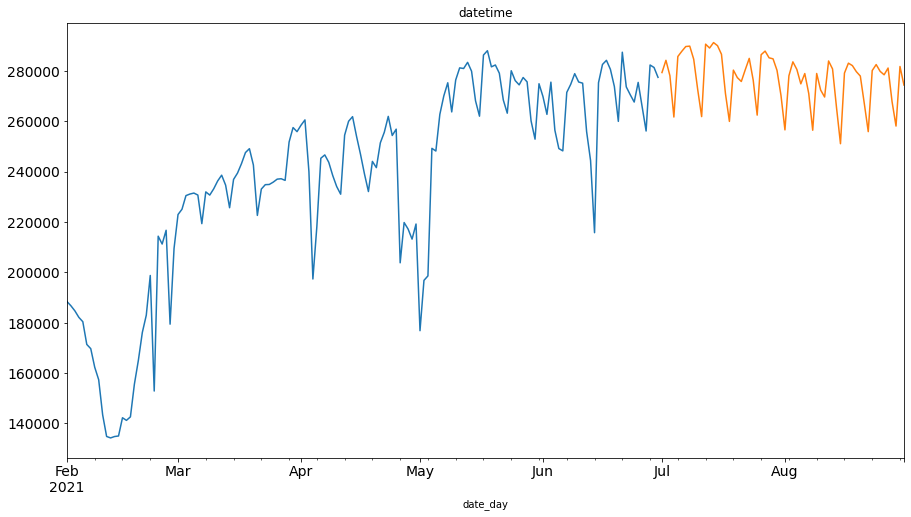

In [29]:
#画图
import matplotlib.pyplot as plt

%matplotlib inline

train['12:00:00'].plot(figsize=(15,8), title= 'datetime', fontsize=14)  # 第一列为例
test['12:00:00'].plot(figsize=(15,8), title= 'datetime' ,fontsize=14)
plt.show()

d:\python\software\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


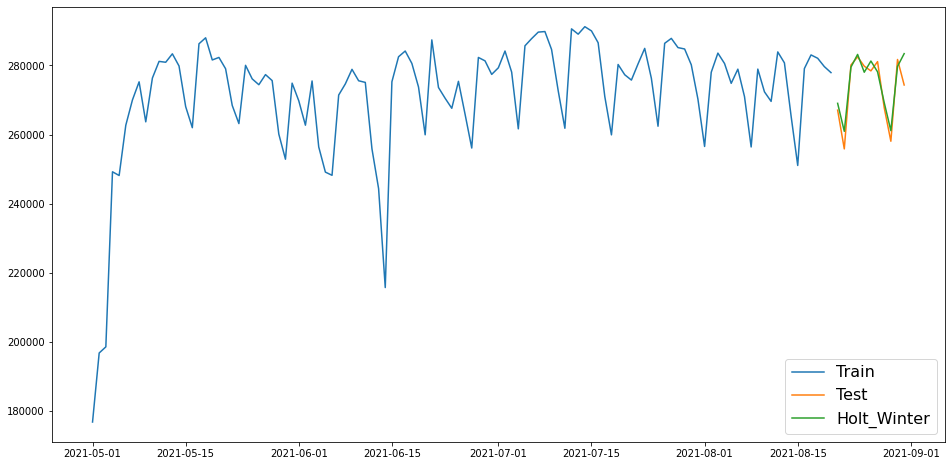

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing  # 指数平滑

train = five_month_data['2021-05-01':'2021-08-20']
test = five_month_data['2021-08-21':'2021-8-31']

T_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['12:00:00']), seasonal_periods=7, trend='add', seasonal='mul').fit()
T_hat['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16, 8))
plt.plot(train['12:00:00'], label='Train')
plt.plot(test['12:00:00'], label='Test')
plt.plot(T_hat['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best',fontsize=16)
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rmse = sqrt(mean_squared_error(test['12:00:00'], T_hat['Holt_Winter']))  # 均方根误差
print(rmse)

3675.361695361255


原始序列的ADF检验结果为： (-4.822196638436485, 4.9310759183001065e-05, 6, 116, {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}, 2317.770276828005)


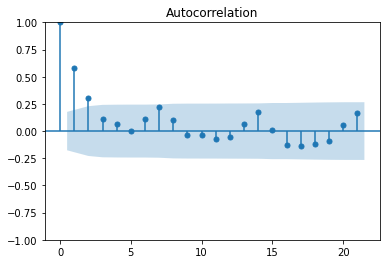

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF

arima_data = five_month_data['2021-05-01':'2021-8-31']
train = five_month_data['2021-05-01':'2021-08-20']
test = five_month_data['2021-08-21':'2021-8-31']

arima_y = arima_data['12:00:00']
plot_acf(arima_y)   # 自相关
print(u'原始序列的ADF检验结果为：',ADF(arima_y))

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
d_arima_y = arima_y.diff().dropna()
d_arima_y.plot()

plot_acf(d_arima_y)

plot_pacf(d_arima_y)

print(u'差分序列的ADF检验结果为：', ADF(d_arima_y))

NameError: name 'arima_y' is not defined

In [ ]:
# p_max = len(d_arima_y) // 10
# q_max = len(d_arima_y) // 10

# bic_martix = []
# for p in range(p_max + 1):
#     tmp = []
#     for q in range(q_max +1):
#         try:
#             tmp.append(ARIMA(arima_y, order=(p,1,q)).fit().bic)
#         except:
#             tmp.append(None)
#     bic_martix.append(tmp)
# bic_martix = pd.DataFrame(bic_martix)
# bic_martix

d:\python\software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\python\software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\python\software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\python\software\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


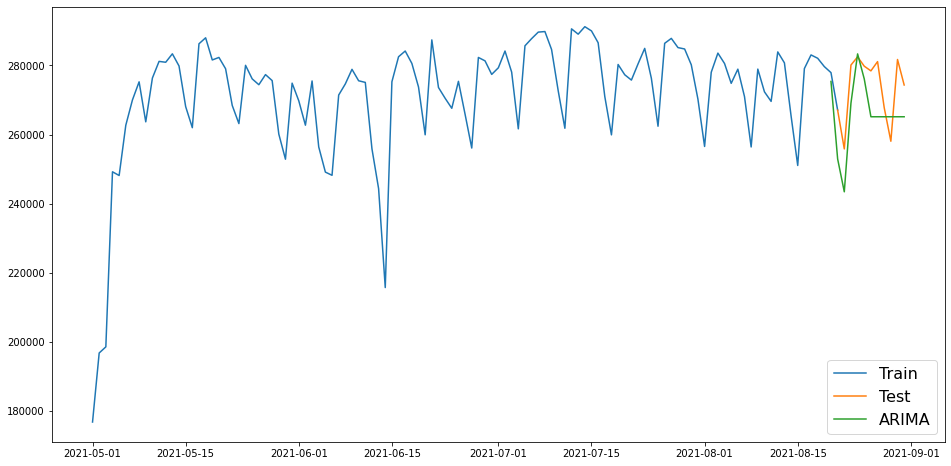

In [50]:
#自回归移动平均模型（ARIMA）
from statsmodels.tsa.arima.model import ARIMA

train = tmp['2021-05-01':'2021-08-21']
test = tmp['2021-08-21':'2021-8-31']

ts_ARIMA = train['12:00:00']
fit1 = ARIMA(ts_ARIMA, order=(0, 1, 7)).fit()
Y_hat_ARIMA = fit1.predict(start="2021-08-20", end="2021-8-31", dynamic=True)

plt.figure(figsize=(16, 8))
plt.plot(train['12:00:00'], label='Train')
plt.plot(test['12:00:00'], label='Test')
plt.plot(Y_hat_ARIMA,label='ARIMA')
plt.legend(loc='best',fontsize=16)


In [51]:
test = tmp['2021-08-20':'2021-8-31']
rmse = sqrt(mean_squared_error(test['12:00:00'], Y_hat_ARIMA))  # 均方根误差
print(rmse)

10580.841900282612


In [ ]:
#SARIMA模型
import statsmodels.api as sm
y_sarima = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
y_sarima['SARIMA'] = fit1.predict(start="2021-08-21", end="2021-8-31", dynamic=True)